# EDA

In [87]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
import seaborn as sns
import ast

%matplotlib inline

sns.set_theme(style="whitegrid", context="talk")

In [88]:
processed_data_path = Path("../data/processed.csv")
df = pd.read_csv(processed_data_path)
df

,Unnamed: 0,movie_id,title,release_date,budget,revenue_worldwide,runtime,genres,imdb_id,franchise,...,imdb_votes,mpaa_rating,domestic_box_office,rotten_tomatoes_score,metacritic_score,awards_text,month,season,critics_score,audience_score
0,0,8193,Napoleon Dynamite,2004-06-11,-0.731466,46118097,95,['Comedy'],tt0374900,False,...,251071.0,PG,44540956.0,72.0,64.0,10 wins & 23 nominations total,6,Summer,6.80,0.70
1,1,663558,New Gods: Nezha Reborn,2021-02-06,-0.737418,70000000,117,"['Animation', 'Fantasy', 'Action']",tt13269670,True,...,4451.0,TV-14,NaN,80.0,NaN,3 wins & 3 nominations total,2,Winter,8.00,0.68
2,2,614409,To All the Boys: Always and Forever,2021-02-12,-0.737418,0,115,"['Romance', 'Comedy', 'Drama']",tt10676012,True,...,37385.0,TV-14,NaN,79.0,65.0,2 wins & 2 nominations total,2,Winter,7.20,0.63
3,3,12,Finding Nemo,2003-05-30,0.661406,940335536,100,"['Animation', 'Family']",tt0266543,True,...,1185437.0,G,380843261.0,99.0,90.0,Won 1 Oscar. 49 wins & 63 nominations total,5,Other,9.45,0.82
4,4,16,Dancer in the Dark,2000-09-01,-0.551404,40061153,140,"['Drama', 'Crime']",tt0168629,False,...,122419.0,R,4184036.0,69.0,63.0,Nominated for 1 Oscar. 34 wins & 48 nomination...,9,Other,6.60,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,796,157544,The Vatican Tapes,2015-07-23,-0.543964,1784763,91,"['Thriller', 'Horror']",tt1524575,False,...,19567.0,PG-13,1784763.0,20.0,38.0,NaN,7,Summer,2.90,0.47
791,797,1900,Traffic,2000-12-27,-0.023125,207500000,147,"['Thriller', 'Drama', 'Crime']",tt0181865,False,...,228102.0,R,124115725.0,93.0,86.0,Won 4 Oscars. 73 wins & 86 nominations total,12,Winter,8.95,0.75
792,798,51052,Arthur Christmas,2011-11-10,-0.588607,151300000,97,"['Drama', 'Animation', 'Family', 'Comedy']",tt1430607,False,...,70891.0,PG,46462469.0,93.0,69.0,Nominated for 2 BAFTA 3 wins & 23 nominations ...,11,Other,8.10,0.71
793,799,1903,Vanilla Sky,2001-12-14,0.274497,203388341,136,"['Mystery', 'Romance', 'Science Fiction']",tt0259711,False,...,299078.0,R,100618344.0,41.0,45.0,Nominated for 1 Oscar. 5 wins & 34 nominations...,12,Winter,4.30,0.69


## Dataset Overview
Inspect schema, summary statistics, and missing values before plotting.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             795 non-null    int64  
 1   movie_id               795 non-null    int64  
 2   title                  795 non-null    object 
 3   release_date           795 non-null    object 
 4   budget                 795 non-null    float64
 5   revenue_worldwide      795 non-null    int64  
 6   runtime                795 non-null    int64  
 7   genres                 795 non-null    object 
 8   imdb_id                795 non-null    object 
 9   franchise              795 non-null    bool   
 10  cast_popularity_mean   795 non-null    float64
 11  cast_popularity_max    795 non-null    float64
 12  director_popularity    795 non-null    float64
 13  original_language      795 non-null    object 
 14  imdb_rating            795 non-null    float64
 15  imdb_v

In [90]:
overview_stats = df.describe(include='all').transpose().round(2)
overview_stats.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,795.0,NaN,NaN,NaN,400.188679,231.709439,0.0,199.5,400.0,600.5,800.0
movie_id,795.0,NaN,NaN,NaN,227460.943396,316234.483268,12.0,8276.5,34283.0,402381.0,1376434.0
title,795,794,Monster,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,795,732,2000-12-22,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,795.0,NaN,NaN,NaN,0.0,1.0,-0.737418,-0.73593,-0.439796,0.378665,6.55284
revenue_worldwide,795.0,NaN,NaN,NaN,173332127.686792,268012579.271297,0.0,207836.5,60780981.0,210823015.0,2068223624.0
runtime,795.0,NaN,NaN,NaN,109.987421,30.446507,3.0,93.0,106.0,121.0,585.0
genres,795,406,['Drama'],30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imdb_id,795,795,tt0374900,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
franchise,795,2,False,460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
missing_summary = (
    df.isna()
      .mean()
      .sort_values(ascending=False)
      .to_frame(name='pct_missing')
      .assign(pct_missing=lambda s: (s['pct_missing'] * 100).round(2))
)
missing_summary.head(20)

,pct_missing
domestic_box_office,27.30
metacritic_score,20.75
rotten_tomatoes_score,15.72
awards_text,13.96
critics_score,13.08
mpaa_rating,5.41
title,0.00
movie_id,0.00
Unnamed: 0,0.00
imdb_id,0.00


## Data Quality & Feature Engineering
Standardize critical columns (dates, genres) and add helper fields for later plots.

In [92]:
duplicate_rows = df.duplicated(subset='movie_id').sum()
if duplicate_rows:
    df = df.drop_duplicates(subset='movie_id').copy()
    print(f"Dropped {duplicate_rows} duplicate movie_id rows.")
else:
    print("No duplicate movie_id rows found.")

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year
df['decade'] = (df['year'] // 10) * 10
df['month_name'] = df['release_date'].dt.strftime('%b')

def _ensure_list(value):
    if isinstance(value, list):
        return value
    if isinstance(value, str):
        try:
            parsed = ast.literal_eval(value)
            return parsed if isinstance(parsed, list) else [parsed]
        except (SyntaxError, ValueError):
            return [value]
    return []

df['genres_list'] = df['genres'].apply(_ensure_list)
df['primary_genre'] = df['genres_list'].apply(lambda g: g[0] if g else None)

for col in ['revenue_worldwide', 'domestic_box_office']:
    df[f'log_{col}'] = np.log1p(df[col].clip(lower=0))

df[['release_date', 'year', 'decade', 'primary_genre']].head()

No duplicate movie_id rows found.


,release_date,year,decade,primary_genre
0,2004-06-11,2004,2000,Comedy
1,2021-02-06,2021,2020,Animation
2,2021-02-12,2021,2020,Romance
3,2003-05-30,2003,2000,Animation
4,2000-09-01,2000,2000,Drama


## Rating Distributions
Compare the spread of critic- and audience-facing metrics.

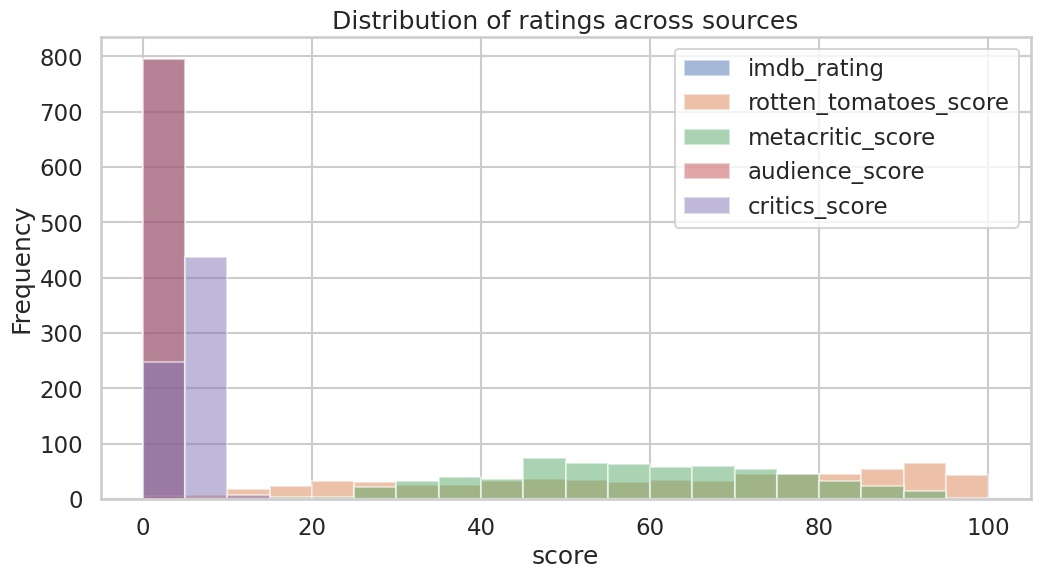

In [93]:
rating_cols = ['imdb_rating', 'rotten_tomatoes_score', 'metacritic_score', 'audience_score', 'critics_score']
df[rating_cols].plot(kind='hist', alpha=0.5, bins=20, figsize=(12, 6))
plt.title('Distribution of ratings across sources')
plt.xlabel('score')
plt.show()

## Relationships & Correlations
Identify which quantitative features move with worldwide revenue.

In [94]:
numeric_df = df.select_dtypes(include=[np.number])
corr_with_revenue = numeric_df.corr()['revenue_worldwide'].sort_values(ascending=False)
corr_with_revenue

revenue_worldwide          1.000000
domestic_box_office        0.929386
budget                     0.768441
log_domestic_box_office    0.603803
imdb_votes                 0.593788
log_revenue_worldwide      0.493674
cast_popularity_mean       0.388949
runtime                    0.310908
cast_popularity_max        0.279534
director_popularity        0.267565
audience_score             0.253140
imdb_rating                0.253140
metacritic_score           0.138338
rotten_tomatoes_score      0.134834
critics_score              0.130838
month                      0.062289
year                      -0.023221
decade                    -0.059255
Unnamed: 0                -0.081472
movie_id                  -0.134404
Name: revenue_worldwide, dtype: float64

In [95]:
q2_df = df[(df['season'].isin(['Summer', 'Winter'])) & (df['revenue_worldwide'] > 0)].copy()

In [96]:
seasonal_comparison = q2_df.groupby('season')['revenue_worldwide'].mean().sort_values(ascending=False)

print("Average Worldwide Revenue by Season:")
print(seasonal_comparison)

Average Worldwide Revenue by Season:
season
Summer    2.341969e+08
Winter    2.190730e+08
Name: revenue_worldwide, dtype: float64


In [97]:
q3_df = df.explode('genres_list').rename(columns={'genres_list': 'genre'})
q3_df = q3_df.dropna(subset=['genre'])

In [98]:
genre_comparison = q3_df.groupby('genre')[['audience_score', 'critics_score']].mean().dropna()

In [99]:
genre_comparison['difference'] = genre_comparison['audience_score'] - genre_comparison['critics_score']

print("Ratings Comparison by Genre (Audience vs Critics):")
print(genre_comparison.sort_values(by='difference', ascending=False))

Ratings Comparison by Genre (Audience vs Critics):
                 audience_score  critics_score  difference
genre                                                     
Horror                 0.589286       5.229630   -4.640344
Romance                0.644962       5.533193   -4.888231
Comedy                 0.631031       5.520045   -4.889015
Mystery                0.644091       5.625424   -4.981333
Thriller               0.648173       5.668956   -5.020783
Action                 0.660285       5.795370   -5.135086
Crime                  0.672920       5.828241   -5.155320
Music                  0.654706       5.950000   -5.295294
Western                0.720000       6.050000   -5.330000
War                    0.715217       6.045238   -5.330021
Science Fiction        0.661150       6.011881   -5.350731
Adventure              0.661512       6.021978   -5.360466
Fantasy                0.659416       6.050855   -5.391439
Family                 0.641570       6.086842   -5.445272
Drama

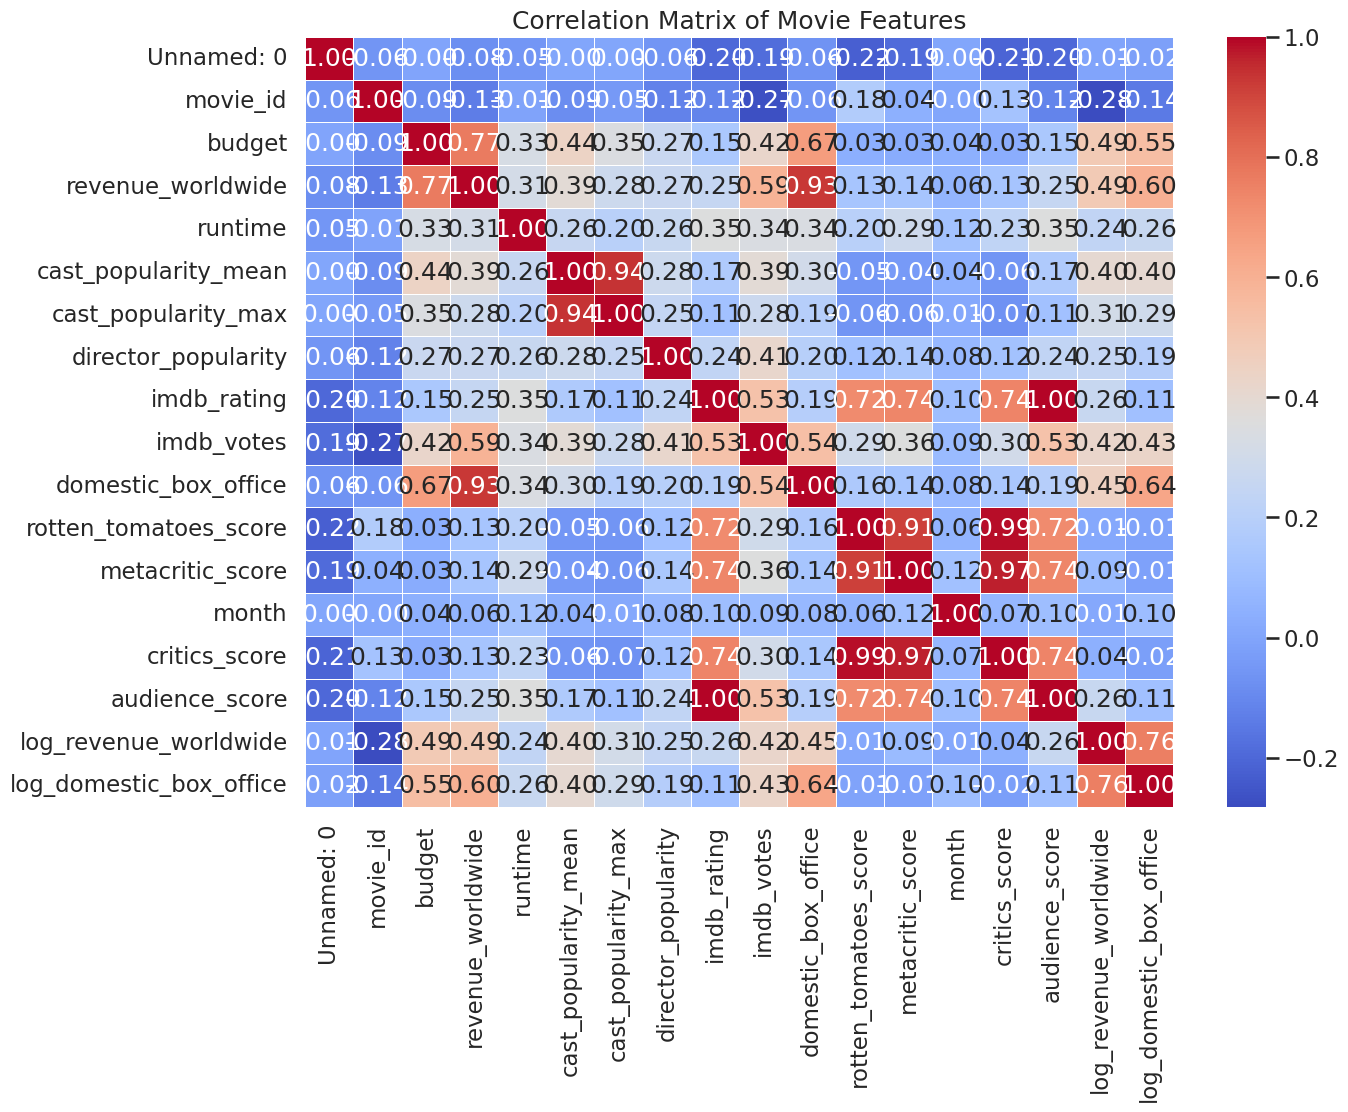

Top Predictors for Worldwide Revenue:
revenue_worldwide          1.000000
domestic_box_office        0.929386
budget                     0.768441
log_domestic_box_office    0.603803
imdb_votes                 0.593788
log_revenue_worldwide      0.493674
cast_popularity_mean       0.388949
runtime                    0.310908
cast_popularity_max        0.279534
director_popularity        0.267565
Name: revenue_worldwide, dtype: float64


In [100]:
# Compute the correlation matrix for numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Movie Features')
plt.show()

# Print specifically what correlates with Revenue
print("Top Predictors for Worldwide Revenue:")
print(corr_matrix['revenue_worldwide'].sort_values(ascending=False).head(10))

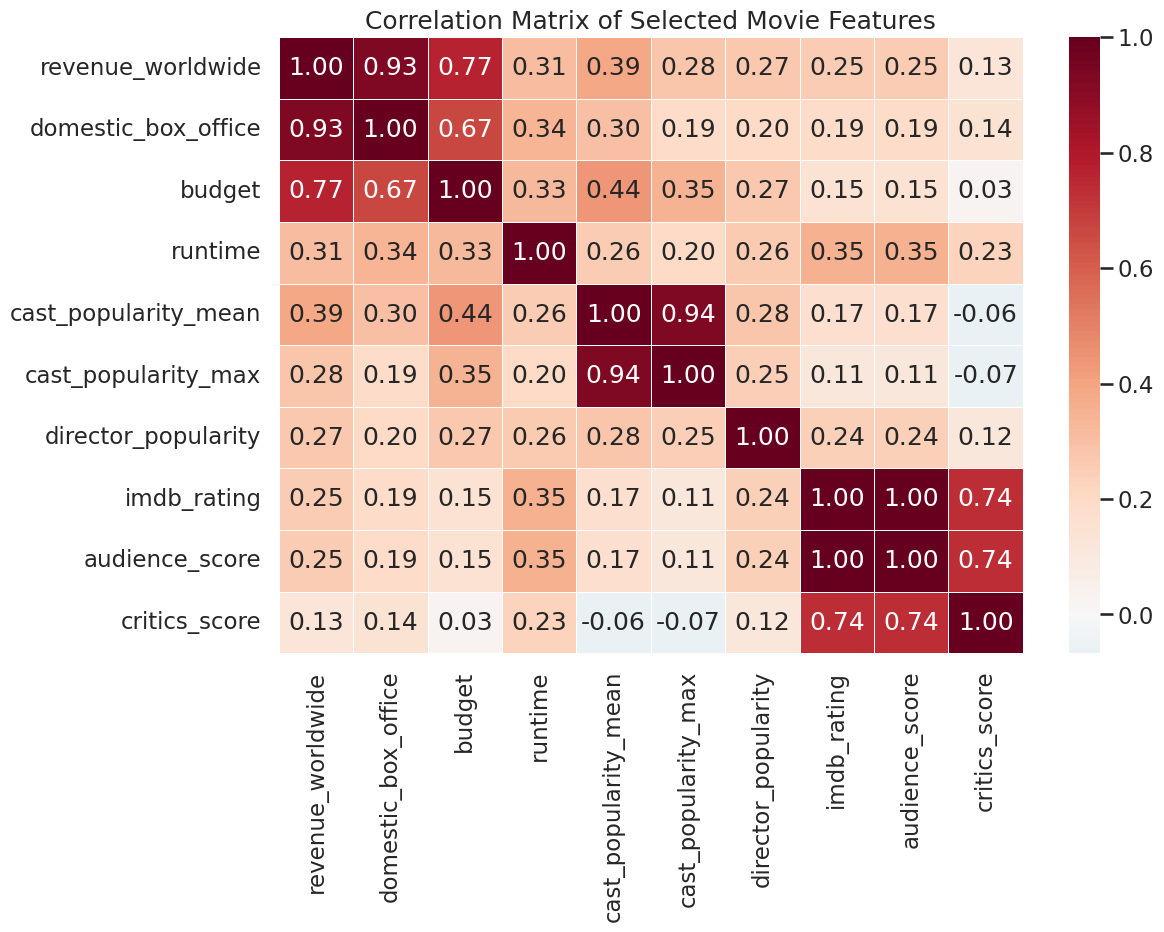

Top Predictors for Worldwide Revenue:
revenue_worldwide       1.000000
domestic_box_office     0.929386
budget                  0.768441
cast_popularity_mean    0.388949
runtime                 0.310908
cast_popularity_max     0.279534
director_popularity     0.267565
imdb_rating             0.253140
audience_score          0.253140
critics_score           0.130838
Name: revenue_worldwide, dtype: float64


In [105]:
corr_cols = ['revenue_worldwide', 'domestic_box_office', 'budget', 'runtime',
             'cast_popularity_mean', 'cast_popularity_max', 'director_popularity',
             'imdb_rating', 'audience_score', 'critics_score']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Selected Movie Features')
plt.show()

print('Top Predictors for Worldwide Revenue:')
print(corr_matrix['revenue_worldwide'].sort_values(ascending=False).head(10))


/tmp/ipykernel_223693/2121495718.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_analysis.values, y=genre_analysis.index, palette='magma')


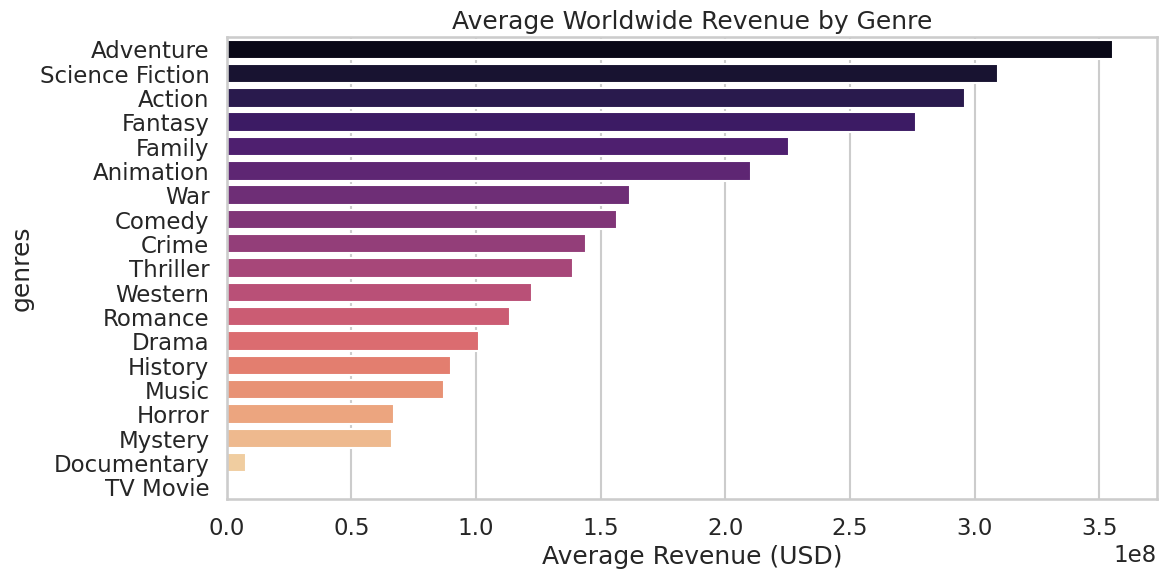

In [ ]:
import ast

# 1. Parse the stringified lists into actual Python lists
# We work on a copy to avoid messing up the main dataframe
df_genres = df.copy()
df_genres['genres'] = df_genres['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# 2. Explode the dataframe so one movie can appear in multiple genre rows
df_exploded = df_genres.explode('genres')

# 3. Calculate Average Revenue per Genre
genre_analysis = df_exploded.groupby('genres')['revenue_worldwide'].mean().sort_values(ascending=False)

# 4. Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_analysis.values, y=genre_analysis.index, palette='magma')
plt.title('Average Worldwide Revenue by Genre')
plt.xlabel('Average Revenue (USD)')
plt.show()